In [120]:
import os
import re
import string
import numpy as np
import pandas as pd
from collections import defaultdict
from nltk.corpus import stopwords
from sklearn import model_selection
from nltk.tokenize import word_tokenize
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from sklearn.metrics import classification_report
from tabulate import tabulate
import matplotlib.pyplot as plt

In [121]:
folder_path = "./Files/DataFile"

In [152]:
stopwords = ['a', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'another', 'any', 'anyhow',  'anything', 'anyway', 'anywhere', 'are', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'have', 'having', 'he', 'her', 'here',  'hereby', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
              'this','those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'you', 'your', 'yours', 'yourself',
             'yourselves']

In [123]:
# for Loading files
folder_path = "./Files/DataFile"


# Step 1: Read the text documents from a folder
def read_text_documents(folder_path):
    documents = []
    labels = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                document = file.read()
                documents.append(document)
                labels.append(file_name.split('.')[0])  # Assuming file names represent labels
    return documents, labels


In [124]:
# Step 2: Vectorize the text data
def vectorize_text(documents):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(documents)
    return X.toarray(), vectorizer



In [125]:
# Step 3: Build and train the Bayesian Network
def build_bayesian_network(X, labels):
    model = BayesianNetwork()

    # Define the structure of the Bayesian network
    model.add_nodes_from(X.columns)
    model.add_edges_from([(X.columns[i], 'label') for i in range(len(X.columns))])

    # Estimate the parameters using Maximum Likelihood Estimation
    model.fit(X, estimator=MaximumLikelihoodEstimator)

    return model



In [126]:
# Step 4: Classify a new text document using the trained model
def classify_document(model, document, vectorizer):
    X = vectorizer.transform([document])
    prediction = model.predict(X)[0]
    return prediction



In [127]:
# Step 5: Evaluate the classification performance
def evaluate_classification(model, X_test, y_test):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    return report



In [128]:
# Step 1: Read the text documents
import os

def read_text_documents(folder_path):
    documents = []
    labels = []
    
    # Iterate over folders inside the main folder_path
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                document = file.read()
                documents.append(document)
                labels.append(os.path.basename(root))
    
    return documents, labels


In [129]:
X = []  # an element of X is represented as (filename, text)
Y = []  # an element of Y represents the category of the corresponding X element


for category in os.listdir(folder_path):
    category_dir = os.path.join(folder_path, category)    
    for document in os.listdir(category_dir):
        file_path = os.path.join(category_dir, document)
        
      
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            # Process the file content
            content = file.read()
            
            # Store the file content and category in X and Y lists
            X.append(content)
            Y.append(category)
           
    print("There are %d messages/files:\n\n %s" % (len(X), X[:2]))
    print("\n")
print("There are %d labels/files:\n%s" % (len(Y), Y[:1]))


There are 401 messages/files:

 ['assume nothing . \nthe phrase is perhaps one of the most used of the 1990\'s , as first impressions and rumors are hardly ever what they seem to be . \nthe phrase especially goes for oscar novak , an architect who is the main focus of three to tango , a delightful , funny romantic comedy about assumptions and being yourself . \nnovak ( matthew perry ) , a shy , clumsy , chicago based architect , along with openly gay partner , peter steinberg ( oliver platt ) , fights for projects day in and day out . \none of these is the job of restoring a popular building for charles newman ( dylan mcdermott ) , a rich , well-known businessman . \ncharles immediately takes a liking to oscar , as he enjoys his personality and sense of humor . \nseeing oscar as someone he could trust , charles asks him to watch his girlfriend , an unpredictable , adventurous girl named amy post ( neve campbell ) , who makes a living by blowing glass . \ncharles wants to know who she t

NotADirectoryError: [Errno 20] Not a directory: './Files/DataFile/.DS_Store'

In [107]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25)

print("Training data - X:", len(X_train))
print("Training data - Y:", len(Y_train))
print("Testing data - X:", len(X_test))
print("Testing data - Y:", len(Y_test))

Training data - X: 300
Training data - Y: 300
Testing data - X: 101
Testing data - Y: 101


In [108]:
from sklearn import model_selection

# Check if the number of samples is greater than zero
if len(X) > 0 and len(Y) > 0:
    # Perform train-test split
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.20)
    
    # Check the sizes of the training and testing sets
    print("Training data - X:", len(X_train))
    print("Training data - Y:", len(Y_train))
    print("Testing data - X:", len(X_test))
    print("Testing data - Y:", len(Y_test))
else:
    print("Error: Insufficient number of samples in the dataset.")


Training data - X: 320
Training data - Y: 320
Testing data - X: 81
Testing data - Y: 81


In [109]:
print(X_train[2])

bruce willis is a type-casted actor . 
in die hard , he played john mcclaine , a rough and tough chicago cop who gets caught in the wrong place at the wrong time . 
again , in pulp fiction , as butch coolidge , an over-the-hill boxer , he steps on the wrong guys toes . 
in luc besson's the fifth element , willis plays korben dallas , a new york cabby who takes in the wrong passenger at the worst possible time . 
a stylish science fiction epic , the fifth element's complex plot begins right away , in the deserts of egypt ( think stargate ) in 1914 . 
an enormous spacecraft lands above a pyramid where the " 5 elements " are stored and takes them away , vowing to return them when the evil comes back . 
cut to present day , which is our future . 
the year is 2023 , and new york is the city . 
the only basic differences between besson's futuristic depiction and the real life new york is that the smog is thicker , the buildings are higher , and the traffic floats ! 
anyway , the " evil " com

In [110]:
# Create vocabulary (using dictionary)
#topNum specify number of top words. If topNum=0, meaning selecting all words
def createVocabulary(inDataset, stopwordset,topNum):
    vocab = {}
    for i in range(len(inDataset)):
        word_list = []
        for word in inDataset[i].split():
            word_new  = word.strip(string.punctuation).lower()
            if (len(word_new)>1)  and (word_new not in stopwordset):  
                if word_new in vocab:
                    vocab[word_new]+=1
                else:
                    vocab[word_new]=1            
    # sort the dictionary to focus on most frequent words
    vocab_ordered=sorted(vocab.items(), key=lambda x: x[1],reverse=True)
    #import itertools
    if topNum==0:
        return(dict(vocab_ordered))
    elif topNum<len(vocab):
        V_cut=vocab_ordered[0:topNum]
        V_cut=dict(V_cut)
        return(V_cut)      
    return(dict(vocab_ordered))

In [111]:
#stopwords=[]
V=createVocabulary(X_train,stopwords,3000)

print(len(V))
len(V)
V

3000


{'film': 1631,
 'not': 1027,
 'movie': 799,
 "it's": 593,
 'like': 558,
 'good': 401,
 'time': 400,
 'story': 395,
 'character': 369,
 'life': 330,
 'characters': 322,
 'no': 320,
 'way': 318,
 'films': 308,
 'make': 265,
 'best': 265,
 'little': 249,
 'people': 243,
 'really': 237,
 'great': 235,
 'love': 233,
 'new': 232,
 'scene': 227,
 'movies': 216,
 'world': 216,
 'man': 213,
 "doesn't": 205,
 "he's": 197,
 'scenes': 194,
 'makes': 184,
 'performance': 182,
 'know': 181,
 'plot': 172,
 'seen': 171,
 'director': 170,
 "don't": 169,
 'things': 167,
 'end': 166,
 'john': 159,
 'star': 159,
 'work': 156,
 'action': 153,
 'come': 152,
 'years': 151,
 'big': 150,
 'better': 146,
 'young': 145,
 'cast': 144,
 'going': 144,
 'real': 140,
 'say': 140,
 'fact': 140,
 'role': 139,
 'actually': 139,
 'takes': 137,
 'original': 137,
 'played': 136,
 'comedy': 136,
 "isn't": 135,
 'plays': 134,
 'look': 134,
 'day': 133,
 'quite': 131,
 'acting': 130,
 'old': 130,
 'right': 129,
 'black': 128,

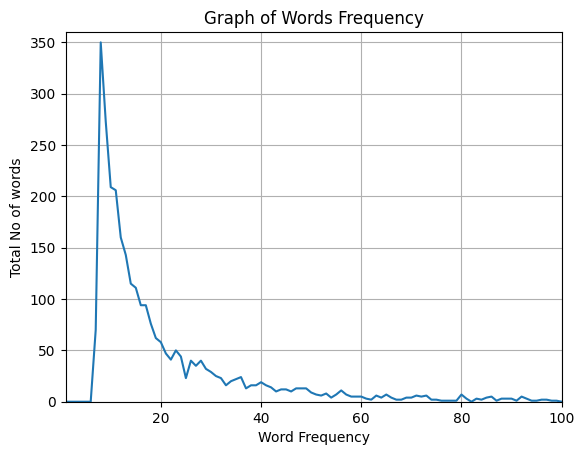

In [112]:
num_words = [0 for i in range(max(V.values())+1)] 
freq = [i for i in range(max(V.values())+1)] 
for key in V:
    num_words[V[key]]+=1
maxv=max(num_words)+10
plt.plot(freq,num_words)
plt.axis([1, 100, 0, maxv])
plt.title("Graph of Words Frequency")
plt.xlabel("Word Frequency")
plt.ylabel("Total No of words")
plt.grid()
plt.show()

In [113]:
# To represent training data as bog of words vector representaton (including counts)
def BoWInstances(inDataset,features):
    inDataset_ = np.zeros((len(inDataset),len(features)))
    # This can take some time to complete
    for i in range(len(inDataset)):
        # print(i) # Uncomment to see progress
        word_list = [ word.strip(string.punctuation).lower() for word in inDataset[i].split()]
        for word in word_list:
            if word in features:
                inDataset_[i][features.index(word)] += 1
    return(inDataset_)

In [114]:
# To represent test data as bag of word vector counts
features = list(V.keys())
X_train_dataset=BoWInstances(X_train,features)
X_test_dataset = BoWInstances(X_test,features)
print("Length of training dataset",len(X_train_dataset))
print("Length of testing dataset",len(X_test_dataset))

Length of training dataset 320
Length of testing dataset 81


In [115]:
# each document is now represented as a vector with sparse values
with np.printoptions(threshold=np.inf):
    print(X_train_dataset[0])

[0. 0. 0. 1. 0. 0. 3. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 2. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [116]:
# now we are loading a target dataset which is Short messages (SMS). We will try to use previous trained email
# spam filter to classify these short messages.
import csv
X_target = []
Y_target=[]

Test_File = "./Files/Test_Data.csv"
Test_Label = "./Files/Test_Labels.csv"


with open(Test_File, 'r', encoding='utf-8', errors='ignore') as f:
    X_target = [line.rstrip() for line in f]

with open(Test_Label, 'r', encoding='utf-8', errors='ignore') as f:
    Y_target = [line.rstrip() for line in f]

print(X_target[0:5])
print("\n")
print(Y_target[0:5])

table = []
for i in range(len(X_target[0:5])):
    table.append((X_target[i], Y_target[i]))
print(tabulate(table, headers=["Sentence", "Sentiment"], tablefmt="grid"))

['I love sunny days.', 'The movie was captivating.', 'I feel sad today.', 'The party was a disaster.', 'She looked stunning in her dress.']


['Positive', 'Positive', 'Negative', 'Negative', 'Positive']
+-----------------------------------+-------------+
| Sentence                          | Sentiment   |
+===================================+=============+
| I love sunny days.                | Positive    |
+-----------------------------------+-------------+
| The movie was captivating.        | Positive    |
+-----------------------------------+-------------+
| I feel sad today.                 | Negative    |
+-----------------------------------+-------------+
| The party was a disaster.         | Negative    |
+-----------------------------------+-------------+
| She looked stunning in her dress. | Positive    |
+-----------------------------------+-------------+


In [117]:
import numpy as np

class BayesianNetworkClassifier:
    def __init__(self):
        self.classes = None
        self.class_word_counts = {}
        self.class_total_counts = {}
        self.class_prior_probs = {}
        self.vocabulary = set()
    
    def fit(self, X_train, Y_train):
        self.classes = np.unique(Y_train)
        num_classes = len(self.classes)
        
        for class_ in self.classes:
            self.class_word_counts[class_] = {}
            self.class_total_counts[class_] = 0
        
        total_documents = len(X_train)
        
        for i in range(total_documents):
            document = X_train[i]
            class_ = Y_train[i]
            
            if class_ not in self.class_prior_probs:
                self.class_prior_probs[class_] = 0
            
            self.class_prior_probs[class_] += 1
            self.class_total_counts[class_] += len(document)
            
            for word in document:
                if word not in self.class_word_counts[class_]:
                    self.class_word_counts[class_][word] = 0
                self.class_word_counts[class_][word] += 1
                self.vocabulary.add(word)
        
        for class_ in self.classes:
            self.class_prior_probs[class_] /= total_documents
    
    def __calculate_likelihood(self, word, class_):
        word_count = self.class_word_counts[class_].get(word, 0)
        total_count = self.class_total_counts[class_]
        vocab_size = len(self.vocabulary)
        
        # Apply Laplace smoothing to avoid zero probabilities
        likelihood = (word_count + 1) / (total_count + vocab_size)
        return likelihood
    
    def __calculate_posterior(self, document, class_):
        posterior = np.log(self.class_prior_probs[class_])
        
        for word in document:
            likelihood = self.__calculate_likelihood(word, class_)
            posterior += np.log(likelihood)
        
        return posterior
    
    def predict(self, X_test):
        Y_pred = []
        
        for document in X_test:
            best_class = None
            best_posterior = float('-inf')
            
            for class_ in self.classes:
                posterior = self.__calculate_posterior(document, class_)
                
                if posterior > best_posterior:
                    best_class = class_
                    best_posterior = posterior
            
            Y_pred.append(best_class)
        
        return Y_pred
    
    def score(self,Y_pred,Y_true):
        # returns the mean accuracy
        count = 0
        for i in range(len(Y_pred)):
            if Y_pred[i] == Y_true[i]:
                count+=1
        return count/len(Y_pred)


In [118]:
len(X_target),len(Y_target)

(400, 400)

In [119]:
clf2 = BayesianNetworkClassifier()
clf2.fit(X_train_dataset,Y_train)
Y_test_pred = clf2.predict(X_test_dataset)
our_score_test = clf2.score(Y_test_pred,Y_test)  
print("*** Report when complete data is taken ***")
print("Our score on Testing data :",our_score_test)
print("Classification report for training data :-")
print(classification_report(Y_test, Y_test_pred))

*** Report when complete data is taken ***
Our score on Testing data : 1.0
Classification report for training data :-
              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00        81

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



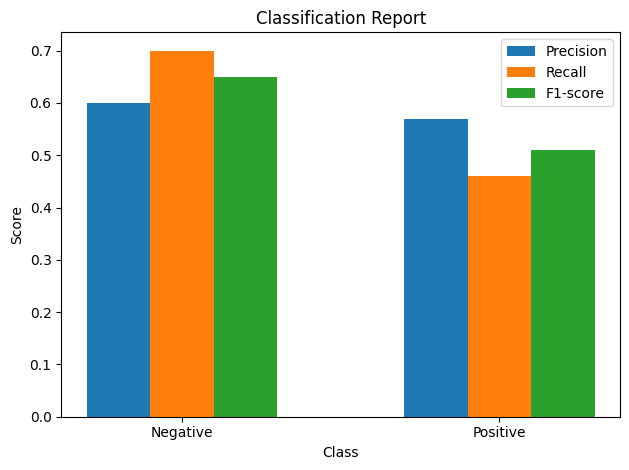

In [51]:
import matplotlib.pyplot as plt

# Classification report data
precision = [0.60, 0.57]
recall = [0.70, 0.46]
f1_score = [0.65, 0.51]

labels = ['Negative', 'Positive']

# Plot the histogram
fig, ax = plt.subplots()
x = range(len(precision))
bar_width = 0.2

ax.bar(x, precision, bar_width, label='Precision')
ax.bar([val + bar_width for val in x], recall, bar_width, label='Recall')
ax.bar([val + 2*bar_width for val in x], f1_score, bar_width, label='F1-score')

# Customize the plot
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Classification Report')
ax.set_xticks([val + bar_width for val in x])
ax.set_xticklabels(labels)
ax.legend()

# Display the histogram
plt.tight_layout()
plt.show()


In [103]:
X_train_, X_test_, Y_train_, Y_test_ = model_selection.train_test_split(X_target, Y_target, test_size=0.95)

print("Training data - X:", len(X_train_))
print("Training data - Y:", len(Y_train_))
print("Testing data - X:", len(X_test_))
print("Testing data - Y:", len(Y_test_))

Training data - X: 20
Training data - Y: 20
Testing data - X: 380
Testing data - Y: 380


In [104]:
V_=createVocabulary(X_train_,stopwords,2000)
features_ = list(V_.keys())
X_target_dataset=BoWInstances(X_train_,features_)
X_target_testset=BoWInstances(X_test_,features_)

#print(X_target_testset[0])

In [106]:
clf2_ = BayesianNetworkClassifier()
clf2_.fit(X_target_dataset,Y_train_)
Y_test_pred_ = clf2_.predict(X_target_testset)
our_score_test = clf2_.score(Y_test_pred_,Y_test_)
print("score on testing data :",our_score_test)
print("For Test Data - Classification report:-")
print(classification_report(Y_test_, Y_test_pred_))

score on testing data : 0.5289473684210526
For Test Data - Classification report:-
              precision    recall  f1-score   support

    Negative       0.79      0.16      0.26       191
     Neutral       0.00      0.00      0.00        10
    Positive       0.50      0.96      0.66       179

    accuracy                           0.53       380
   macro avg       0.43      0.37      0.31       380
weighted avg       0.63      0.53      0.44       380



/Users/neelimarajawat/PycharmProjects/NR1.0/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/neelimarajawat/PycharmProjects/NR1.0/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/neelimarajawat/PycharmProjects/NR1.0/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

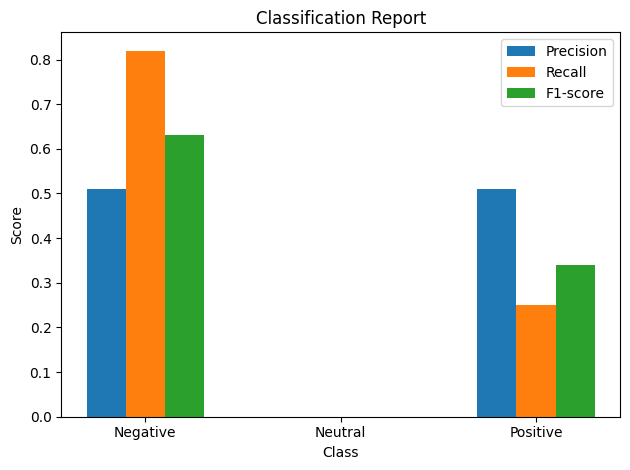

In [55]:
import matplotlib.pyplot as plt

# Classification report data
precision = [0.51, 0.00, .51]
recall = [0.82, 0.00, 0.25]
f1_score = [0.63, 0.00, 0.34]

labels = ['Negative', 'Neutral','Positive']

# Plot the histogram
fig, ax = plt.subplots()
x = range(len(precision))
bar_width = 0.2

ax.bar(x, precision, bar_width, label='Precision')
ax.bar([val + bar_width for val in x], recall, bar_width, label='Recall')
ax.bar([val + 2*bar_width for val in x], f1_score, bar_width, label='F1-score')

# Customize the plot
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Classification Report')
ax.set_xticks([val + bar_width for val in x])
ax.set_xticklabels(labels)
ax.legend()

# Display the histogram
plt.tight_layout()
plt.show()


In [146]:
X_train_, X_test_, Y_train_, Y_test_ = model_selection.train_test_split(X_target, Y_target, test_size=0.90)

print("Training data - X:", len(X_train_))
print("Training data - Y:", len(Y_train_))
print("Testing data - X:", len(X_test_))
print("Testing data - Y:", len(Y_test_))

Training data - X: 40
Training data - Y: 40
Testing data - X: 360
Testing data - Y: 360


In [147]:
V_=createVocabulary(X_train_,stopwords,2000)
features_ = list(V_.keys())
X_target_dataset=BoWInstances(X_train_,features_)
X_target_testset=BoWInstances(X_test_,features_)

#print(X_target_testset[0])

In [148]:
clf2_ = BayesianNetworkClassifier()
clf2_.fit(X_target_dataset,Y_train_)
Y_test_pred_ = clf2_.predict(X_target_testset)
our_score_test = clf2_.score(Y_test_pred_,Y_test_)
print("score on testing data :",our_score_test)
print("For Test Data - Classification report:-")
print(classification_report(Y_test_, Y_test_pred_))

score on testing data : 0.5027777777777778
For Test Data - Classification report:-
              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67       180
     Neutral       0.00      0.00      0.00        10
    Positive       1.00      0.01      0.01       170

    accuracy                           0.50       360
   macro avg       0.50      0.34      0.23       360
weighted avg       0.72      0.50      0.34       360



/Users/neelimarajawat/PycharmProjects/NR1.0/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/neelimarajawat/PycharmProjects/NR1.0/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/neelimarajawat/PycharmProjects/NR1.0/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

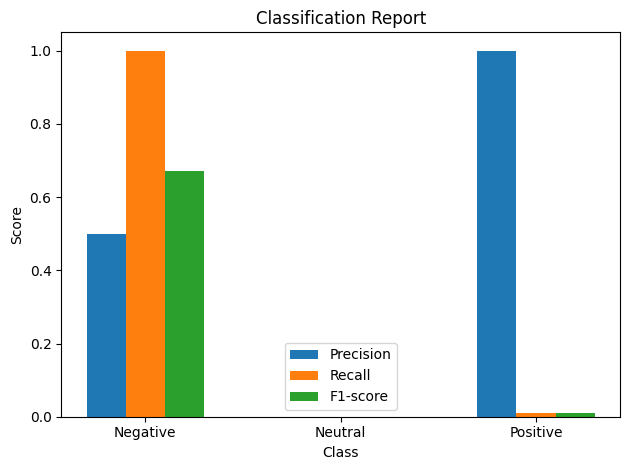

In [150]:
import matplotlib.pyplot as plt

# Classification report data
precision = [.50, 0.00, 1.00]
recall = [1.00, 0.00, 0.01]
f1_score = [0.67, 0.00, 0.01]

labels = ['Negative', 'Neutral','Positive']

# Plot the histogram
fig, ax = plt.subplots()
x = range(len(precision))
bar_width = 0.2

ax.bar(x, precision, bar_width, label='Precision')
ax.bar([val + bar_width for val in x], recall, bar_width, label='Recall')
ax.bar([val + 2*bar_width for val in x], f1_score, bar_width, label='F1-score')

# Customize the plot
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Classification Report')
ax.set_xticks([val + bar_width for val in x])
ax.set_xticklabels(labels)
ax.legend()

# Display the histogram
plt.tight_layout()
plt.show()